# Carga de datasets

In [67]:
import pandas as pd

# Carga de datasets
df_base_clientes = pd.read_csv('../../dataset/base_clientes.csv', sep=',')
df_base_consumos = pd.read_csv('../../dataset/base_consumos.csv', sep=',')
df_base_saldos_creditos = pd.read_csv('../../dataset/base_saldos_creditos.csv', sep=',')
df_base_saldos_cuentas = pd.read_csv('../../dataset/base_saldos_cuentas.csv', sep=',')
df_universo = pd.read_csv('../../dataset/universo.csv', sep=',')

# Verificación rápida
print("Datasets cargados correctamente:")
print(f"base_clientes → {df_base_clientes.shape}")
print(f"base_consumos → {df_base_consumos.shape}")
print(f"base_saldos_creditos → {df_base_saldos_creditos.shape}")
print(f"base_saldos_cuentas → {df_base_saldos_cuentas.shape}")
print(f"universo → {df_universo.shape}")


Datasets cargados correctamente:
base_clientes → (809579, 14)
base_consumos → (3697738, 7)
base_saldos_creditos → (11597785, 8)
base_saldos_cuentas → (8876560, 5)
universo → (535943, 3)


In [86]:
# Conteo de nulos por dataset
dfs = {
    'base_clientes': df_base_clientes,
    'base_consumos': df_base_consumos,
    'base_saldos_creditos': df_base_saldos_creditos,
    'base_saldos_cuentas': df_base_saldos_cuentas,
    'universo': df_universo
}

for name, df in dfs.items():
    total_nulos = df.isnull().sum().sum()
    print(f"🔹 {name}: {total_nulos} valores nulos totales")
    print(df.isnull().sum()[df.isnull().sum() > 0])  # Mostrar solo las columnas con nulos
    print("─" * 50)

🔹 base_clientes: 0 valores nulos totales
Series([], dtype: int64)
──────────────────────────────────────────────────
🔹 base_consumos: 0 valores nulos totales
Series([], dtype: int64)
──────────────────────────────────────────────────
🔹 base_saldos_creditos: 0 valores nulos totales
Series([], dtype: int64)
──────────────────────────────────────────────────
🔹 base_saldos_cuentas: 0 valores nulos totales
Series([], dtype: int64)
──────────────────────────────────────────────────
🔹 universo: 0 valores nulos totales
Series([], dtype: int64)
──────────────────────────────────────────────────


# Analizando Datasets

## Universo

In [68]:
df_universo.head()

,ID,target,periodo
0,4d5a33701cb5b30b0b0a924d80de4ae78fbd0b54e2117fc9fa8a18b6c03a7463,0,period_5
1,bf7092e5f394d266143dfe90b3fc73eac51f0b0084d7a350a66bc5886a3a2735,0,period_5
2,270d8f8f607d19886c50edb7746c3670194134b56d31e2389b95baa046e8e81a,0,period_5
3,5e6b7bea5e4911329669f45728d3398ad54dfe11fbb16d1f6c77968679cfa4a9,0,period_5
4,98954adf775b9fce1c9e311a025ec3e0a1c6e90f991ef7f26130b02106f2326c,0,period_5


El dataset df_universo contiene el listado de clientes etiquetados con el motivo de abandono del segmento objetivo (con la variable target).

In [69]:
print(f"La cantidad de registros duplicados en df_universo es: {df_universo.duplicated().sum()}")

La cantidad de registros duplicados en df_universo es: 0


### Variable objetivo (`target`)

La variable **`target`** representa el motivo de abandono de un cliente, y puede tomar uno de los siguientes valores:

| Código | Descripción del motivo de abandono |
|:-------:|------------------------------------|
| **0** | Cliente inactivo o con bajo movimiento. |
| **1** | Reducción de saldos activos o pasivos. |
| **2** | Cancelación voluntaria de productos. |
| **3** | Comportamiento crediticio negativo. |
| **4** | Cambio de segmento o migración a otro perfil. |
| **5** | Otros motivos (presente solo en algunos datasets). |

A continuación, se observa la distribución de clases en el dataset actual:



In [70]:
df_universo.value_counts('target')

target
0    464075
1     47171
5      8489
4      6893
2      5929
3      3386
Name: count, dtype: int64



Como se puede apreciar, la clase **0 (Cliente inactivo o con bajo movimiento)** es claramente mayoritaria, lo cual indica un **desequilibrio en las clases**.  
Por lo tanto, será necesario aplicar **técnicas de balanceo de datos** (como *undersampling*, *oversampling* o *SMOTE*) antes de entrenar el modelo para evitar sesgos en el aprendizaje.


In [71]:
df_universo.value_counts('periodo')

periodo
period_5    91539
period_6    91072
period_4    90920
period_3    88998
period_2    87386
period_1    86028
Name: count, dtype: int64

Vemos que los períodos de extracción de estos datos se han realizados en diferentes períodos

---

## Base saldos cuentas

In [72]:
df_base_saldos_cuentas.head()

,mes,ID,saldo_ahorros,saldo_otros,periodo
0,11,c7a6cecac361a970ee6c7cb9f2679c38c668940c6ebdc5b5c26a21b6220ae00a,4.1900,0.0,period_5
1,12,68f89dc7efe7cd1ce3cf6d52d8867bd2b84f236736bf9153653837be6e767296,4.4621,0.0,period_5
2,2,e3f6afb18792d0b97cb9a63ad9567bbd106146c78d212aa299aaab83be16d141,4.2878,0.0,period_5
3,1,8993170400939d522bdc72707527f5ab90202119fe3cab5b4653bef638f7adf0,5.0000,5.0,period_5
4,7,399d686897232a55c713d61a6bdc7e232ab85b864d62888b805af748a8533256,3.8922,0.0,period_5


In [73]:
df_base_saldos_cuentas['ID'].value_counts()

ID
b16caf597063cd68a39a8855a62d7e4e23f232268e1e7ded994a237e0505c70a    12
4ea872f81fb6da5620fa14a48ccc1c0b67f61a439c6d3a7be2548a2141f9b364    12
d498fa0dacca77be6877befa138f89d68b77049025a5304b561825dc5b9ce687    12
a9f804ff4f707700fb9f527df3c97fa3616a93ee5ddeac78460211562592a2c9    12
f5a8359c342422386ba48c0677107886a086fd2dcc4b07a3e71c1560d6cc6d81    12
                                                                    ..
19727afee8e85dba6099ca657535cd260d2cd6037f7483533319f93aea2fd399     1
e9fb9ee1a41e71a774935a61129373edea419a104e0929a4ef9a796e6e9da877     1
a968155881b5490ee463d9c7c655bc4c2a2d24f94e533765d561be6d4e05b5f8     1
f581eb5745e30f5ba794485e7d53548089356eb1eb5e6145dc90c77d85e6ad1e     1
86c1def658cffaa66f0e9b0c87ebb290cefa40bc2f5f1109e2f4f9064f178835     1
Name: count, Length: 790580, dtype: int64

In [74]:
df_base_saldos_cuentas.query(
    "ID == 'b16caf597063cd68a39a8855a62d7e4e23f232268e1e7ded994a237e0505c70a'"
).sort_values(by='mes', ascending=False)


,mes,ID,saldo_ahorros,saldo_otros,periodo
6644427,12,b16caf597063cd68a39a8855a62d7e4e23f232268e1e7ded994a237e0505c70a,2.8134,0.0,period_6
6324620,11,b16caf597063cd68a39a8855a62d7e4e23f232268e1e7ded994a237e0505c70a,2.8462,0.0,period_6
7537483,10,b16caf597063cd68a39a8855a62d7e4e23f232268e1e7ded994a237e0505c70a,2.9610,0.0,period_6
6549902,9,b16caf597063cd68a39a8855a62d7e4e23f232268e1e7ded994a237e0505c70a,2.9231,0.0,period_6
6299563,8,b16caf597063cd68a39a8855a62d7e4e23f232268e1e7ded994a237e0505c70a,3.0765,0.0,period_6
7588017,7,b16caf597063cd68a39a8855a62d7e4e23f232268e1e7ded994a237e0505c70a,3.0881,0.0,period_6
7858505,6,b16caf597063cd68a39a8855a62d7e4e23f232268e1e7ded994a237e0505c70a,3.2278,0.0,period_6
6534216,5,b16caf597063cd68a39a8855a62d7e4e23f232268e1e7ded994a237e0505c70a,2.9975,0.0,period_6
6024684,4,b16caf597063cd68a39a8855a62d7e4e23f232268e1e7ded994a237e0505c70a,3.0764,0.0,period_6
7683080,3,b16caf597063cd68a39a8855a62d7e4e23f232268e1e7ded994a237e0505c70a,3.2475,0.0,period_6


#### Limpieza de nulos

In [75]:
# Calcular cantidad y porcentaje de nulos por columna
nulos = df_base_saldos_cuentas.isnull().sum().reset_index()
nulos.columns = ['columna', 'nulos']
nulos['porcentaje'] = (nulos['nulos'] / len(df_base_saldos_cuentas)) * 100

# Mostrar el resultado ordenado por mayor porcentaje de nulos
nulos = nulos.sort_values(by='porcentaje', ascending=False)

print(nulos)


         columna  nulos  porcentaje
0            mes      0         0.0
1             ID      0         0.0
2  saldo_ahorros      0         0.0
3    saldo_otros      0         0.0
4        periodo      0         0.0


Vemos que no hay nulos

In [76]:
resumen_meses_bd_consumo = df_base_saldos_cuentas.groupby(['periodo', 'mes']).size().reset_index()

In [77]:
resumen_meses_bd_consumo.groupby('periodo').agg(
    mes_maximo=('mes', 'max'),
    mes_minimo=('mes', 'min')
)


,mes_maximo,mes_minimo
periodo,,
period_1,12,1
period_2,12,1
period_3,12,1
period_4,12,1
period_5,12,1
period_6,12,1
period_7,12,1
period_8,12,1
period_9,12,1


In [78]:
# Verificar si cada periodo tiene los 12 meses
meses_por_periodo = (
    resumen_meses_bd_consumo
    .groupby('periodo')['mes']
    .nunique()
    .reset_index(name='cantidad_meses')
)

# Mostrar periodos incompletos
meses_incompletos = meses_por_periodo[meses_por_periodo['cantidad_meses'] < 12]

print("Periodos con meses incompletos:")
print(meses_incompletos)


Periodos con meses incompletos:
Empty DataFrame
Columns: [periodo, cantidad_meses]
Index: []


#### Tratamiento de duplicados

In [79]:
df_base_saldos_cuentas.duplicated().sum()

np.int64(0)

#### Tratatimiento de valores atípicos

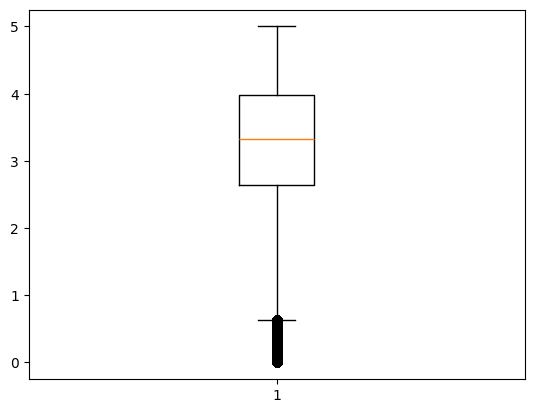

In [80]:
import matplotlib.pyplot as plt
plt.boxplot(df_base_saldos_cuentas['saldo_ahorros'])
plt.show()

Si tenemos 535943 fuga y aquí tenemos en esta base de datos de base_saldos_cuentas 790580 IDs, quiere decir que hay 254637 IDs que no se han fugado de la base histórica, por lo que nos preguntamos si sería razonable considerarlo para la limpieza de outliers

In [81]:
# Hacer el merge (izquierda: base saldos)
df_base_saldos_cuentas_with_churn = df_base_saldos_cuentas.merge(
    df_universo[['ID']],  # solo necesitamos la columna ID
    on='ID',
    how='left',
    indicator=True  # agrega una columna _merge para identificar coincidencias
)

# Crear la columna target: 1 si existe en df_universo, 0 si no
df_base_saldos_cuentas_with_churn['target'] = (df_base_saldos_cuentas_with_churn['_merge'] == 'both').astype(int)

# Eliminar la columna auxiliar '_merge'
df_base_saldos_cuentas_with_churn = df_base_saldos_cuentas_with_churn.drop(columns=['_merge'])

# Mostrar resultado
df_base_saldos_cuentas_with_churn.head()


,mes,ID,saldo_ahorros,saldo_otros,periodo,target
0,11,c7a6cecac361a970ee6c7cb9f2679c38c668940c6ebdc5b5c26a21b6220ae00a,4.1900,0.0,period_5,1
1,12,68f89dc7efe7cd1ce3cf6d52d8867bd2b84f236736bf9153653837be6e767296,4.4621,0.0,period_5,1
2,2,e3f6afb18792d0b97cb9a63ad9567bbd106146c78d212aa299aaab83be16d141,4.2878,0.0,period_5,1
3,1,8993170400939d522bdc72707527f5ab90202119fe3cab5b4653bef638f7adf0,5.0000,5.0,period_5,1
4,7,399d686897232a55c713d61a6bdc7e232ab85b864d62888b805af748a8533256,3.8922,0.0,period_5,1


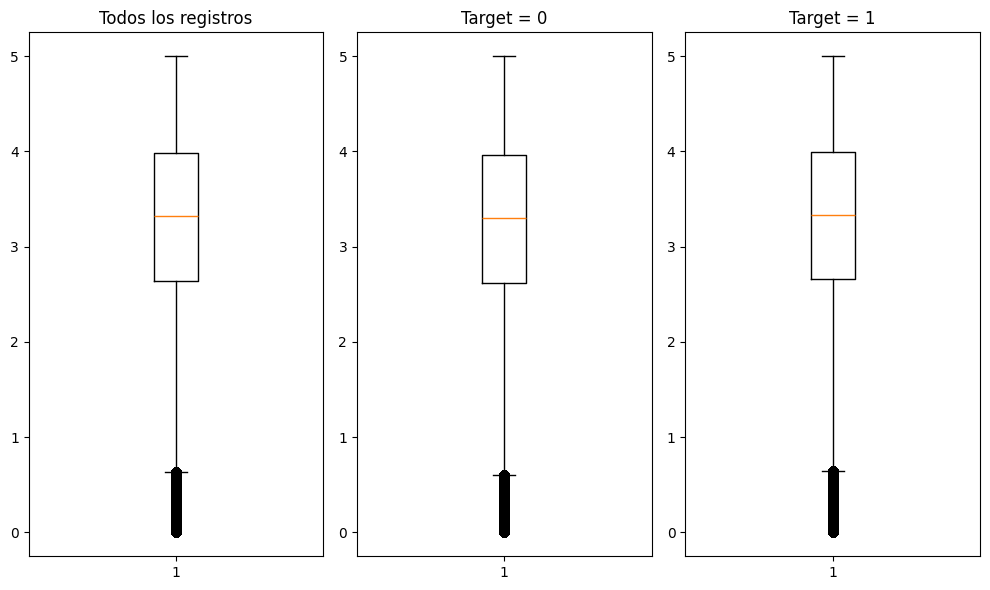

Outliers (Todos): 581420
Outliers (Target = 0): 194765
Outliers (Target = 1): 387075


In [82]:
import matplotlib.pyplot as plt

# 1️⃣ Caso general: todos los registros
Q1_all = df_base_saldos_cuentas_with_churn['saldo_ahorros'].quantile(0.25)
Q3_all = df_base_saldos_cuentas_with_churn['saldo_ahorros'].quantile(0.75)
IQR_all = Q3_all - Q1_all

lim_inf_all = Q1_all - 1.5 * IQR_all
lim_sup_all = Q3_all + 1.5 * IQR_all

outliers_all = df_base_saldos_cuentas_with_churn[
    (df_base_saldos_cuentas_with_churn['saldo_ahorros'] < lim_inf_all) | 
    (df_base_saldos_cuentas_with_churn['saldo_ahorros'] > lim_sup_all)
]

# 2️⃣ target = 0
df_0 = df_base_saldos_cuentas_with_churn[df_base_saldos_cuentas_with_churn['target'] == 0]
Q1_0 = df_0['saldo_ahorros'].quantile(0.25)
Q3_0 = df_0['saldo_ahorros'].quantile(0.75)
IQR_0 = Q3_0 - Q1_0

lim_inf_0 = Q1_0 - 1.5 * IQR_0
lim_sup_0 = Q3_0 + 1.5 * IQR_0

outliers_0 = df_0[(df_0['saldo_ahorros'] < lim_inf_0) | (df_0['saldo_ahorros'] > lim_sup_0)]

# 3️⃣ target = 1
df_1 = df_base_saldos_cuentas_with_churn[df_base_saldos_cuentas_with_churn['target'] == 1]
Q1_1 = df_1['saldo_ahorros'].quantile(0.25)
Q3_1 = df_1['saldo_ahorros'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

lim_inf_1 = Q1_1 - 1.5 * IQR_1
lim_sup_1 = Q3_1 + 1.5 * IQR_1

outliers_1 = df_1[(df_1['saldo_ahorros'] < lim_inf_1) | (df_1['saldo_ahorros'] > lim_sup_1)]

# 📊 Crear los 3 boxplots
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.boxplot(df_base_saldos_cuentas_with_churn['saldo_ahorros'])
plt.title('Todos los registros')

plt.subplot(1, 3, 2)
plt.boxplot(df_0['saldo_ahorros'])
plt.title('Target = 0')

plt.subplot(1, 3, 3)
plt.boxplot(df_1['saldo_ahorros'])
plt.title('Target = 1')

plt.tight_layout()
plt.show()

# 🧮 Imprimir cantidad de outliers
print("Outliers (Todos):", len(outliers_all))
print("Outliers (Target = 0):", len(outliers_0))
print("Outliers (Target = 1):", len(outliers_1))


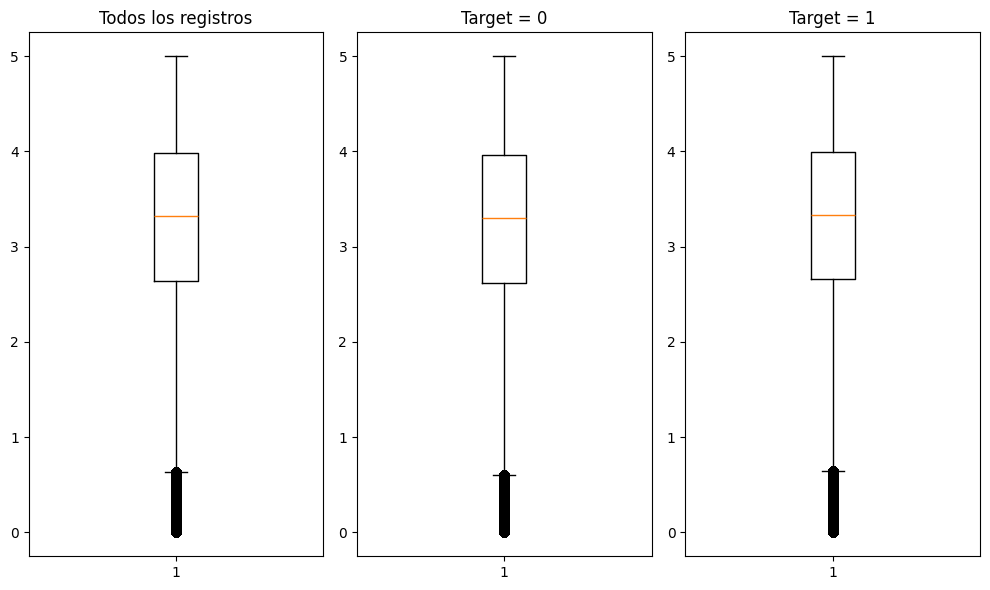

Outliers (Todos): 581420
Outliers (Target = 0): 194765
Outliers (Target = 1): 387075

Distribución de los outliers generales por target:
target
1    383962
0    197458
Name: count, dtype: int64

Porcentaje de registros eliminados si quitamos los outliers generales:
Target 1: 6.53% del total sería eliminado
Target 0: 6.59% del total sería eliminado


In [83]:
import matplotlib.pyplot as plt

# 1️⃣ Caso general: todos los registros
Q1_all = df_base_saldos_cuentas_with_churn['saldo_ahorros'].quantile(0.25)
Q3_all = df_base_saldos_cuentas_with_churn['saldo_ahorros'].quantile(0.75)
IQR_all = Q3_all - Q1_all

lim_inf_all = Q1_all - 1.5 * IQR_all
lim_sup_all = Q3_all + 1.5 * IQR_all

outliers_all = df_base_saldos_cuentas_with_churn[
    (df_base_saldos_cuentas_with_churn['saldo_ahorros'] < lim_inf_all) | 
    (df_base_saldos_cuentas_with_churn['saldo_ahorros'] > lim_sup_all)
]

# 2️⃣ target = 0
df_0 = df_base_saldos_cuentas_with_churn[df_base_saldos_cuentas_with_churn['target'] == 0]
Q1_0 = df_0['saldo_ahorros'].quantile(0.25)
Q3_0 = df_0['saldo_ahorros'].quantile(0.75)
IQR_0 = Q3_0 - Q1_0

lim_inf_0 = Q1_0 - 1.5 * IQR_0
lim_sup_0 = Q3_0 + 1.5 * IQR_0

outliers_0 = df_0[(df_0['saldo_ahorros'] < lim_inf_0) | (df_0['saldo_ahorros'] > lim_sup_0)]

# 3️⃣ target = 1
df_1 = df_base_saldos_cuentas_with_churn[df_base_saldos_cuentas_with_churn['target'] == 1]
Q1_1 = df_1['saldo_ahorros'].quantile(0.25)
Q3_1 = df_1['saldo_ahorros'].quantile(0.75)
IQR_1 = Q3_1 - Q1_1

lim_inf_1 = Q1_1 - 1.5 * IQR_1
lim_sup_1 = Q3_1 + 1.5 * IQR_1

outliers_1 = df_1[(df_1['saldo_ahorros'] < lim_inf_1) | (df_1['saldo_ahorros'] > lim_sup_1)]

# 📊 Crear los 3 boxplots
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.boxplot(df_base_saldos_cuentas_with_churn['saldo_ahorros'])
plt.title('Todos los registros')

plt.subplot(1, 3, 2)
plt.boxplot(df_0['saldo_ahorros'])
plt.title('Target = 0')

plt.subplot(1, 3, 3)
plt.boxplot(df_1['saldo_ahorros'])
plt.title('Target = 1')

plt.tight_layout()
plt.show()

# 🧮 Imprimir cantidad de outliers
print("Outliers (Todos):", len(outliers_all))
print("Outliers (Target = 0):", len(outliers_0))
print("Outliers (Target = 1):", len(outliers_1))

# 4️⃣ Cuántos de los outliers generales corresponden a cada target
outliers_all_target_count = outliers_all['target'].value_counts()
total_target_count = df_base_saldos_cuentas_with_churn['target'].value_counts()

print("\nDistribución de los outliers generales por target:")
print(outliers_all_target_count)

# 5️⃣ Porcentaje de registros afectados
print("\nPorcentaje de registros eliminados si quitamos los outliers generales:")
for t in total_target_count.index:
    porcentaje = (outliers_all_target_count.get(t, 0) / total_target_count[t]) * 100
    print(f"Target {t}: {porcentaje:.2f}% del total sería eliminado")


In [84]:
import numpy as np

# Calcular los cuartiles y el IQR
Q1 = df_base_saldos_cuentas['saldo_ahorros'].quantile(0.25)
Q3 = df_base_saldos_cuentas['saldo_ahorros'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los outliers
outliers = df_base_saldos_cuentas[(df_base_saldos_cuentas['saldo_ahorros'] < limite_inferior) | (df_base_saldos_cuentas['saldo_ahorros'] > limite_superior)]

# Mostrar 5 registros de los outliers
print(outliers.head(5))


     mes                                                                ID  saldo_ahorros  saldo_otros   periodo
74     2  fb53476fd552e17c81bc01421f853f66ac2755cf5b8289596d51b12c2f4590ce         0.5955       0.0000  period_5
82     9  1807eddf9db5dd7689058363441c17dc0e78ba5b1ea76a12279c4bcd17d591bd         0.5077       0.0000  period_5
119    2  2fce12ae35a1d3d94285f4de4d9f08e135c9f443cd18f508f9351df0efe82ec7         0.0000       4.0306  period_5
121    9  c5d971e22e430e3942e3178ecf83570b6fde953477109909259b2dd89e97f225         0.5712       0.0000  period_5
149   11  eddb6b4ea38559fba2e8632815bafd7ec3e166cf655a183e22f20ec86a3cce13         0.0437       4.9205  period_5


In [85]:
df_base_saldos_cuentas.query(
    "ID == 'fb53476fd552e17c81bc01421f853f66ac2755cf5b8289596d51b12c2f4590ce'"
).sort_values(by='mes', ascending=False)


,mes,ID,saldo_ahorros,saldo_otros,periodo
1051098,12,fb53476fd552e17c81bc01421f853f66ac2755cf5b8289596d51b12c2f4590ce,0.5867,0.0,period_5
1715741,11,fb53476fd552e17c81bc01421f853f66ac2755cf5b8289596d51b12c2f4590ce,0.5854,0.0,period_5
3426364,10,fb53476fd552e17c81bc01421f853f66ac2755cf5b8289596d51b12c2f4590ce,0.5764,0.0,period_5
1788946,9,fb53476fd552e17c81bc01421f853f66ac2755cf5b8289596d51b12c2f4590ce,0.5790,0.0,period_5
3480733,8,fb53476fd552e17c81bc01421f853f66ac2755cf5b8289596d51b12c2f4590ce,0.5738,0.0,period_5
8072602,7,fb53476fd552e17c81bc01421f853f66ac2755cf5b8289596d51b12c2f4590ce,0.5764,0.0,period_5
6484779,6,fb53476fd552e17c81bc01421f853f66ac2755cf5b8289596d51b12c2f4590ce,0.5816,0.0,period_5
3435371,5,fb53476fd552e17c81bc01421f853f66ac2755cf5b8289596d51b12c2f4590ce,0.5892,0.0,period_5
631941,4,fb53476fd552e17c81bc01421f853f66ac2755cf5b8289596d51b12c2f4590ce,0.5980,0.0,period_5
1483474,3,fb53476fd552e17c81bc01421f853f66ac2755cf5b8289596d51b12c2f4590ce,0.5942,0.0,period_5
